Importing necessary libraries

In [12]:
import numpy as np
import torch 
import torchvision
import torchvision.transforms as transforms
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from sklearn import preprocessing

try:
    from einops import rearrange
except ImportError:
    %pip install einops
    from einops import rearrange


Reading the image

In [13]:
img = torchvision.io.read_image("sample_image.jpg")
print(img.shape)

torch.Size([3, 451, 728])


Rearranging and displaying the image

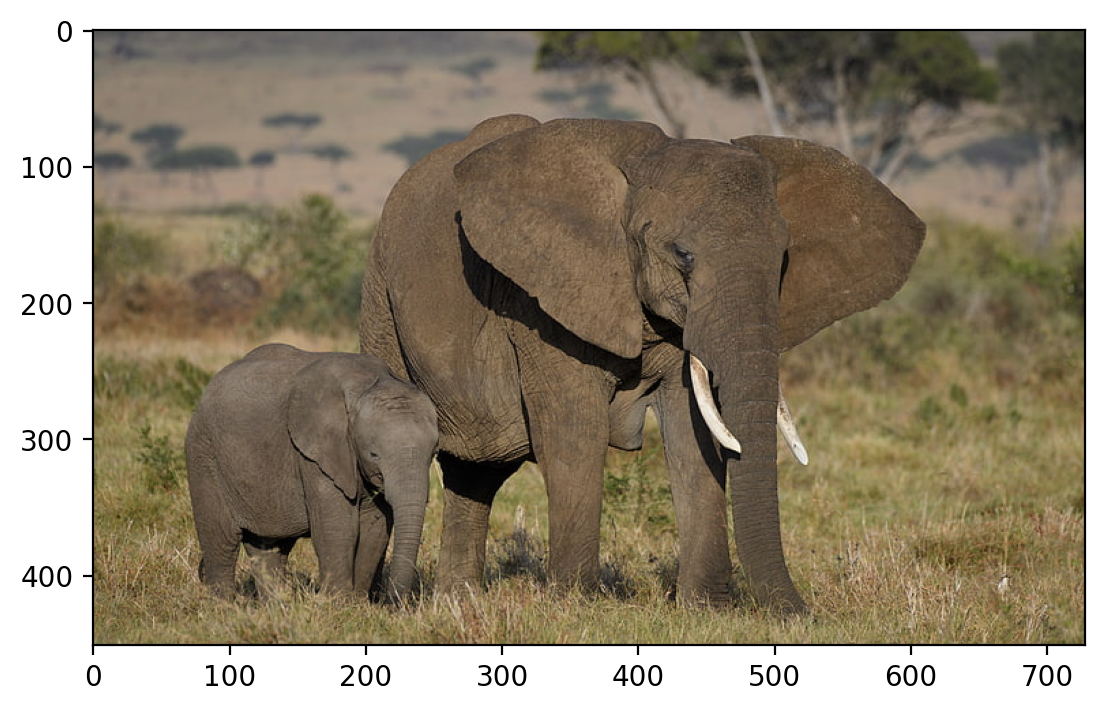

In [14]:
plt.imshow(rearrange(img, 'c h w -> h w c').numpy())

In [15]:
scaler_img = preprocessing.MinMaxScaler().fit(img.reshape(-1, 1))
scaler_img


MinMaxScaler()

Scaling the image

In [17]:
img_scaled = scaler_img.transform(img.reshape(-1, 1)).reshape(img.shape)
img_scaled = torch.tensor(img_scaled)
img_scaled.shape

torch.Size([3, 451, 728])

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img_scaled = img_scaled.to(device)

In [19]:
img_scaled

tensor([[[0.3412, 0.3333, 0.3216,  ..., 0.2667, 0.2784, 0.2863],
         [0.3451, 0.3373, 0.3255,  ..., 0.2627, 0.2706, 0.2784],
         [0.3569, 0.3490, 0.3373,  ..., 0.2549, 0.2627, 0.2706],
         ...,
         [0.4863, 0.6039, 0.5373,  ..., 0.4235, 0.5137, 0.5529],
         [0.4980, 0.5804, 0.5137,  ..., 0.4314, 0.5216, 0.5294],
         [0.5098, 0.5490, 0.4941,  ..., 0.4353, 0.5373, 0.4941]],

        [[0.3490, 0.3412, 0.3294,  ..., 0.2745, 0.2863, 0.2941],
         [0.3529, 0.3451, 0.3333,  ..., 0.2706, 0.2784, 0.2863],
         [0.3569, 0.3490, 0.3373,  ..., 0.2627, 0.2706, 0.2784],
         ...,
         [0.4549, 0.5725, 0.5059,  ..., 0.3765, 0.4627, 0.5020],
         [0.4667, 0.5490, 0.4824,  ..., 0.3843, 0.4706, 0.4784],
         [0.4784, 0.5176, 0.4627,  ..., 0.3882, 0.4863, 0.4431]],

        [[0.3451, 0.3373, 0.3255,  ..., 0.2196, 0.2353, 0.2431],
         [0.3490, 0.3412, 0.3294,  ..., 0.2157, 0.2275, 0.2353],
         [0.3569, 0.3490, 0.3373,  ..., 0.2078, 0.2196, 0.